In [2]:
! pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 1.1 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_im, train_la),(test_im,test_la) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
train_im.shape

(60000, 28, 28)

In [8]:
test_im.shape

(10000, 28, 28)

In [9]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boat']

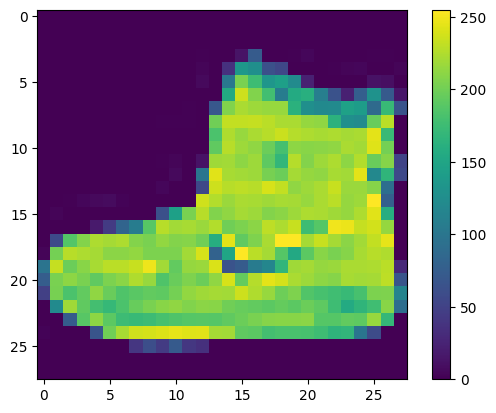

In [10]:
plt.figure()
plt.imshow(train_im[0])
plt.colorbar()

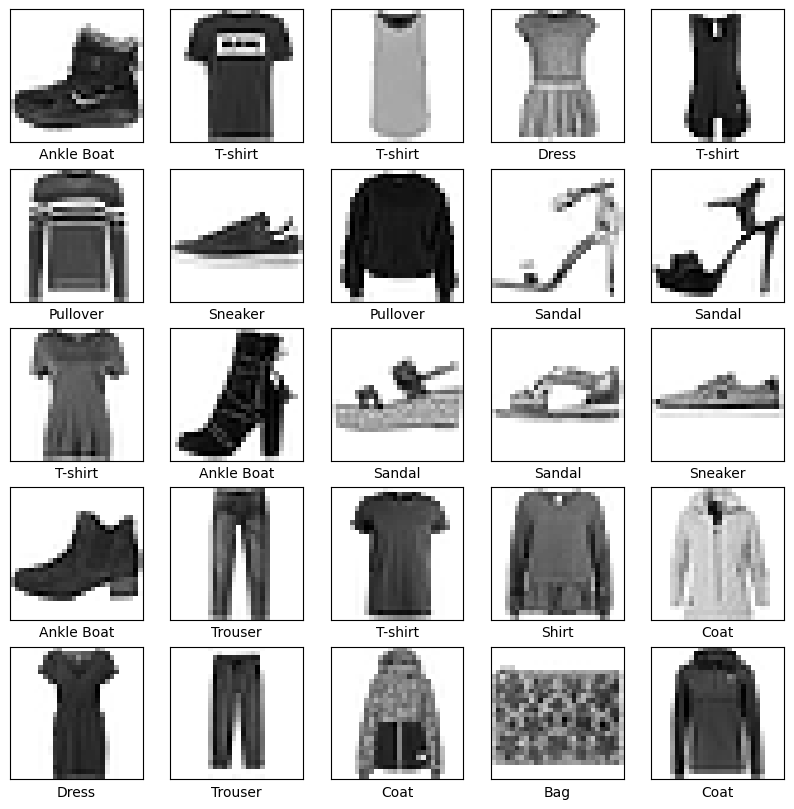

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_im[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_la[i]])

In [12]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(512,activation = tf.nn.relu),
    keras.layers.Dense(512,activation = tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation = tf.nn.softmax)
])

In [13]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
model.fit(train_im,train_la, epochs = 1, validation_data=[test_im,test_la])

1875/1875 [==============================] - 35s 19ms/step - loss: 0.5609 - accuracy: 0.8054 - val_loss: 0.5998 - val_accuracy: 0.7888


In [17]:
test_loss,test_acc = model.evaluate(test_im,test_la)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.5998 - accuracy: 0.7888
Test accuracy 0.7888000011444092


In [18]:
predictions= model.predict(test_im)

313/313 [==============================] - 1s 4ms/step


In [19]:
predictions[0]

array([2.8640442e-04, 2.0751204e-05, 2.3064227e-05, 3.2990501e-05,
       1.1611505e-04, 1.4187159e-01, 3.7959417e-05, 1.1444862e-01,
       6.0637663e-03, 7.3709869e-01], dtype=float32)

In [20]:
np.argmax(predictions)

21

In [21]:
class_names[np.argmax(predictions[0])]

'Ankle Boat'

In [22]:
[class_names[i] for i in np.argsort(predictions[0])][::-1]

['Ankle Boat',
 'Sandal',
 'Sneaker',
 'Bag',
 'T-shirt',
 'Coat',
 'Shirt',
 'Dress',
 'Pullover',
 'Trouser']

In [23]:
[predictions[0][i] for i in np.argsort(predictions[0])][::-1]

[0.7370987,
 0.14187159,
 0.11444862,
 0.0060637663,
 0.00028640442,
 0.00011611505,
 3.7959417e-05,
 3.29905e-05,
 2.3064227e-05,
 2.0751204e-05]

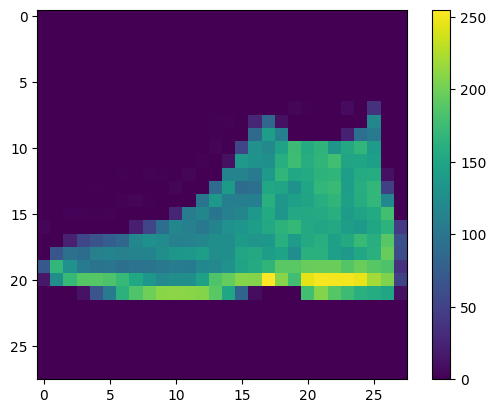

In [24]:
plt.figure()
plt.imshow(test_im[0])
plt.colorbar()

In [25]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(10))
    model.add(keras.layers.Dense(10,activation = tf.nn.softmax))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

    return model

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner = kt.GridSearch(model_builder,
                     objective='val_accuracy',
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
tuner.search(train_im, train_la, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.summary()

In [ ]:
best_model.evaluate(test_im,test_la)

In [ ]:
predections = best_model.predict(test_im)

In [ ]:
[ class_names[np.argmax(i)] for i in predictions]